/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give


📈 Evaluation Metrics (ARIMA Model):

Mean Error (ME): -30.3976
Mean Absolute Error (MAE): 123.0148
Mean Percentage Error (MPE): -68.6433
Mean Absolute Percentage Error (MAPE): 89.6867
Root Mean Squared Error (RMSE): 141.7898
Min-Max Error: 0.3567
Lag-1 Autocorrelation: 0.1268
Correlation Coefficient: 0.0544


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


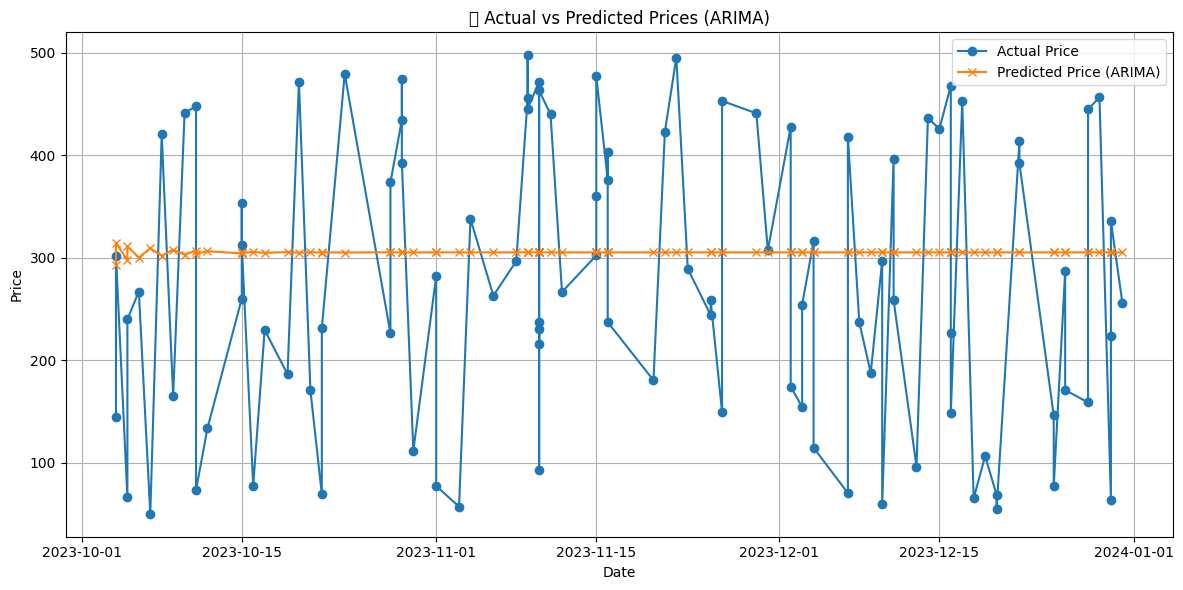

In [3]:
# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import acf

# 📁 Load portfolio data for ARIMA model
portfolio_df = pd.read_csv("financial_portfolio_data.csv")
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])
portfolio_df = portfolio_df.sort_values('Date')

# 🧪 Train-test split
train_size = int(len(portfolio_df) * 0.8)
train = portfolio_df[:train_size]
test = portfolio_df[train_size:]

# 🔮 ARIMA modeling
model = ARIMA(train['Price'], order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# 🧮 Custom evaluation metric functions
def mean_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

def mean_percentage_error(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true) * 100

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def minmax_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), np.abs(y_pred)))

def autocorrelation_lag1(errors):
    return acf(errors, nlags=1)[1]

# 📊 Evaluation
y_true = test['Price'].values
y_pred = forecast.values
errors = y_true - y_pred

metrics = {
    "Mean Error (ME)": mean_error(y_true, y_pred),
    "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred),
    "Mean Percentage Error (MPE)": mean_percentage_error(y_true, y_pred),
    "Mean Absolute Percentage Error (MAPE)": mean_absolute_percentage_error(y_true, y_pred),
    "Root Mean Squared Error (RMSE)": np.sqrt(mean_squared_error(y_true, y_pred)),
    "Min-Max Error": minmax_error(y_true, y_pred),
    "Lag-1 Autocorrelation": autocorrelation_lag1(errors),
    "Correlation Coefficient": pearsonr(y_true, y_pred)[0]
}

# 🖨️ Print evaluation results
print("\n📈 Evaluation Metrics (ARIMA Model):\n")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

# 📉 Plot: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], y_true, label='Actual Price', marker='o')
plt.plot(test['Date'], y_pred, label='Predicted Price (ARIMA)', marker='x')
plt.title("📊 Actual vs Predicted Prices (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

